# CMS Covid-19 Nursing Home Data Analysis
Analysis of data submitted by several nursing homes to the CDC's National Healthcare Safety Network (NHSN) COVID-19 Long Term Care Facility Module from 2020 to 2022. \

The data is openly available at [CMS](https://data.cms.gov/covid-19/covid-19-nursing-home-data) \

The data dictionary is available [Here](https://data.cms.gov/sites/default/files/2022-09/COVID-19%20Nursing%20Home%20Data%20Dictionary%209.1.22.pdf)


- Author: Debanjan Saha
- PI: Prof. S. Radhakrishnan
- Affiliation: College of Engineering, Northeastern University, Boston, MA


Mount Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Import Libraries

In [2]:
from io import IncrementalNewlineDecoder
import numbers
from typing import Optional
import numpy as np
import pandas as pd
# pd.set_option('display.max_rows', 50)
# pd.set_option('display.max_columns', 50)

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('whitegrid')

import plotly.express as px

### Read Data

In [3]:
raw_data = pd.read_csv('/content/drive/MyDrive/Northeastern/Labs/IE5374/NursingHome/COVID-19 Nursing Home Data 08.28.2022.csv', parse_dates=['Week Ending'])
raw_data.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (1,41,42,43,44,45) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Week Ending,Federal Provider Number,Provider Name,Provider Address,Provider City,Provider State,Provider Zip Code,Provider Phone Number,County,Submitted Data,...,Percentage of Current Residents Up to Date with COVID-19 Vaccines with No Medical Contraindications,Percentage of Current Residents with a Completed Vaccination Up to Date with COVID-19 Vaccines,Number of Healthcare Personnel with a Completed Vaccination Staying in this Facility for At Least 1 Day This Week who Received a COVID-19 Vaccine Booster at Any Time,Recent Percentage of Current Healthcare Personnel with a Completed Vaccination who Received a COVID-19 Vaccine Booster at Any Time,Percentage of Current Healthcare Personnel with a Completed Vaccination who Received a COVID-19 Vaccine Booster at Any Time,Number of Healthcare Personnel Eligible to Work in this Facility for At Least 1 Day This Week Up to Date with COVID-19 Vaccines,Recent Percentage of Current Healthcare Personnel Up to Date with COVID-19 Vaccines,Percentage of Current Healthcare Personnel Up to Date with COVID-19 Vaccines,Percentage of Current Healthcare Personnel Up to Date with COVID-19 Vaccines with No Medical Contraindications,Percentage of Current Healthcare Personnel with a Completed Vaccination Up to Date with COVID-19 Vaccines
0,2020-05-24,15009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,2563324110,Franklin,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-05-31,15009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,2563324110,Franklin,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-06-07,15009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,2563324110,Franklin,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-06-14,15009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,2563324110,Franklin,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-06-21,15009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,2563324110,Franklin,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
raw_data['week'] = raw_data['Week Ending'].dt.to_period("W-SUN").dt.to_timestamp()
raw_data["month"] = raw_data['Week Ending'].dt.to_period("M").dt.to_timestamp()
raw_data["quarter"] = raw_data['Week Ending'].dt.to_period("Q").dt.to_timestamp()
raw_data["year"] = raw_data['Week Ending'].dt.year

In [6]:
raw_data['Shortage of Nursing Staff_'] = np.where(raw_data['Shortage of Nursing Staff'] == 'Y', 1, 0)
raw_data['Shortage of Clinical Staff_'] = np.where(raw_data['Shortage of Clinical Staff'] == 'Y', 1, 0)
raw_data['Shortage of Aides_'] = np.where(raw_data['Shortage of Aides'] == 'Y', 1, 0)
raw_data['Shortage of Other Staff_'] = np.where(raw_data['Shortage of Other Staff'] == 'Y', 1, 0)
raw_data['Facility No Longer Has Supply Items in 7 Days_'] = np.where(raw_data['Facility No Longer Has Supply Items in 7 Days'] == 'Y', 1, 0)
raw_data['N95 Respirator No Longer Available in 7 Days_'] = np.where(raw_data['N95 Respirator No Longer Available in 7 Days'] == 'Y', 1, 0)
raw_data['Face Masks No Longer Available in 7 Days_'] = np.where(raw_data['Face Masks No Longer Available in 7 Days'] == 'Y', 1, 0)
raw_data['Eye Protection No Longer Available in 7 Days_'] = np.where(raw_data['Eye Protection No Longer Available in 7 Days'] == 'Y', 1, 0)
raw_data['Gowns No Longer Available in 7 Days_'] = np.where(raw_data['Gowns No Longer Available in 7 Days'] == 'Y', 1, 0)
raw_data['Gloves No Longer Available in 7 Days_'] = np.where(raw_data['Gloves No Longer Available in 7 Days'] == 'Y', 1, 0)
raw_data.drop(columns=['Shortage of Nursing Staff', 'Shortage of Clinical Staff', 'Shortage of Aides', 'Shortage of Other Staff', 'Facility No Longer Has Supply Items in 7 Days',
              'N95 Respirator No Longer Available in 7 Days', 'Face Masks No Longer Available in 7 Days', 'Eye Protection No Longer Available in 7 Days', 
              'Gowns No Longer Available in 7 Days', 'Gloves No Longer Available in 7 Days'], axis=1, inplace=True)

In [7]:
raw_data.head()

,Week Ending,Federal Provider Number,Provider Name,Provider Address,Provider City,Provider State,Provider Zip Code,Provider Phone Number,County,Submitted Data,...,Shortage of Nursing Staff_,Shortage of Clinical Staff_,Shortage of Aides_,Shortage of Other Staff_,Facility No Longer Has Supply Items in 7 Days_,N95 Respirator No Longer Available in 7 Days_,Face Masks No Longer Available in 7 Days_,Eye Protection No Longer Available in 7 Days_,Gowns No Longer Available in 7 Days_,Gloves No Longer Available in 7 Days_
0,2020-05-24,15009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,2563324110,Franklin,Y,...,0,0,0,0,0,0,0,0,0,0
1,2020-05-31,15009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,2563324110,Franklin,Y,...,0,0,0,0,0,0,0,0,0,0
2,2020-06-07,15009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,2563324110,Franklin,Y,...,0,0,0,0,0,0,0,0,0,0
3,2020-06-14,15009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,2563324110,Franklin,Y,...,0,0,0,0,0,0,0,0,0,0
4,2020-06-21,15009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,2563324110,Franklin,Y,...,0,0,0,0,0,0,0,0,0,0


In [8]:
raw_data.info(memory_usage = "deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1816451 entries, 0 to 1816450
Columns: 124 entries, Week Ending to Gloves No Longer Available in 7 Days_
dtypes: datetime64[ns](4), float64(96), int64(13), object(11)
memory usage: 2.6 GB


In [9]:
# Display the number of rows and columns
print("Number of rows: {}".format(raw_data.shape[0]))
print("Number of cols: {}".format(raw_data.shape[1]))

Number of rows: 1816451
Number of cols: 124


## Data Investigation

In [10]:
raw_data.dtypes

Week Ending                                      datetime64[ns]
Federal Provider Number                                  object
Provider Name                                            object
Provider Address                                         object
Provider City                                            object
                                                      ...      
N95 Respirator No Longer Available in 7 Days_             int64
Face Masks No Longer Available in 7 Days_                 int64
Eye Protection No Longer Available in 7 Days_             int64
Gowns No Longer Available in 7 Days_                      int64
Gloves No Longer Available in 7 Days_                     int64
Length: 124, dtype: object

### Memory Optimization

#### Downcast Int & Float Datatype

In [11]:
np_types = [np.int8 ,np.int16 ,np.int32, np.int64,
           np.uint8 ,np.uint16, np.uint32, np.uint64]
np_types = [np_type.__name__ for np_type in np_types]
type_df = pd.DataFrame(data=np_types, columns=['class_type'])
type_df['min_value'] = type_df['class_type'].apply(lambda row: np.iinfo(row).min)
type_df['max_value'] = type_df['class_type'].apply(lambda row: np.iinfo(row).max)
type_df['range'] = type_df['max_value'] - type_df['min_value']
type_df.sort_values(by='range', inplace=True)
type_df

,class_type,min_value,max_value,range
0,int8,-128,127,2.550000e+02
4,uint8,0,255,2.550000e+02
1,int16,-32768,32767,6.553500e+04
5,uint16,0,65535,6.553500e+04
2,int32,-2147483648,2147483647,4.294967e+09
6,uint32,0,4294967295,4.294967e+09
3,int64,-9223372036854775808,9223372036854775807,1.844674e+19
7,uint64,0,18446744073709551615,1.844674e+19


In [12]:
def auto_opt_pd_dtypes(df_: pd.DataFrame, inplace=False) -> Optional[pd.DataFrame]:
    """ Automatically downcast Number dtypes for minimal possible,
        will not touch other (datetime, str, object, etc)
        Original Implementation by banderlog013
        https://stackoverflow.com/a/67403354
        Improvement in data size by Debanjan Saha
        
        :param df_: dataframe
        :param inplace: if False, will return a copy of input dataset
        
        :return: `None` if `inplace=True` or dataframe if `inplace=False`
    """
    df = df_ if inplace else df_.copy()
        
    for col in df.columns:
        # integers
        if issubclass(df[col].dtypes.type, numbers.Integral):
            col_min = df[col].min()
            col_max = df[col].max()
            temp = type_df[(type_df['min_value'] <= col_min) & (type_df['max_value'] >= col_max)]
            optimized_class = temp.loc[temp['range'].idxmin(), 'class_type']
            # print("Col name : {} Col min_value : {} Col max_value : {} Optimized Class : {}".format(col, col_min, col_max, optimized_class))
            df[col] = df[col].astype(optimized_class)
        # other real numbers
        elif issubclass(df[col].dtypes.type, numbers.Real):
            df[col] = pd.to_numeric(df[col], downcast='float')
    
    if not inplace:
        return df

In [13]:
raw_data.info(memory_usage = "deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1816451 entries, 0 to 1816450
Columns: 124 entries, Week Ending to Gloves No Longer Available in 7 Days_
dtypes: datetime64[ns](4), float64(96), int64(13), object(11)
memory usage: 2.6 GB


In [14]:
auto_opt_pd_dtypes(raw_data, inplace=True)
raw_data.info(memory_usage = "deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1816451 entries, 0 to 1816450
Columns: 124 entries, Week Ending to Gloves No Longer Available in 7 Days_
dtypes: datetime64[ns](4), float32(96), int16(1), int32(1), int64(1), int8(10), object(11)
memory usage: 1.9 GB


### Dimension Data Type Modification

In [15]:
def set_col_last_first(df, col_reorg):
    """Function to set the last column as the first column"""
    col_idx = []
    original_cols = df.columns.tolist()
    start_idx = 0
    for idx, ele in enumerate(original_cols):
        if ele in col_reorg:
            if start_idx == 0:
                start_idx = idx
            col_idx.append(idx) 

    reorder_cols = original_cols[start_idx:] + original_cols[:start_idx]
    df = df[reorder_cols]
    return df

In [16]:
raw_data['facility_id'] = raw_data['Federal Provider Number'].astype('str')
new_cols = ['week', 'month', 'quarter', 'year']
raw_data = set_col_last_first(raw_data, new_cols)
raw_data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  """Entry point for launching an IPython kernel.


,week,month,quarter,year,Shortage of Nursing Staff_,Shortage of Clinical Staff_,Shortage of Aides_,Shortage of Other Staff_,Facility No Longer Has Supply Items in 7 Days_,N95 Respirator No Longer Available in 7 Days_,...,Percentage of Current Residents Up to Date with COVID-19 Vaccines with No Medical Contraindications,Percentage of Current Residents with a Completed Vaccination Up to Date with COVID-19 Vaccines,Number of Healthcare Personnel with a Completed Vaccination Staying in this Facility for At Least 1 Day This Week who Received a COVID-19 Vaccine Booster at Any Time,Recent Percentage of Current Healthcare Personnel with a Completed Vaccination who Received a COVID-19 Vaccine Booster at Any Time,Percentage of Current Healthcare Personnel with a Completed Vaccination who Received a COVID-19 Vaccine Booster at Any Time,Number of Healthcare Personnel Eligible to Work in this Facility for At Least 1 Day This Week Up to Date with COVID-19 Vaccines,Recent Percentage of Current Healthcare Personnel Up to Date with COVID-19 Vaccines,Percentage of Current Healthcare Personnel Up to Date with COVID-19 Vaccines,Percentage of Current Healthcare Personnel Up to Date with COVID-19 Vaccines with No Medical Contraindications,Percentage of Current Healthcare Personnel with a Completed Vaccination Up to Date with COVID-19 Vaccines
0,2020-05-18,2020-05-01,2020-04-01,2020,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-05-25,2020-05-01,2020-04-01,2020,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-06-01,2020-06-01,2020-04-01,2020,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-06-08,2020-06-01,2020-04-01,2020,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-06-15,2020-06-01,2020-04-01,2020,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
# display data types
raw_data.drop(columns=['Federal Provider Number'],
              axis=1, inplace=True)
raw_data.dtypes

week                                                                                                                               datetime64[ns]
month                                                                                                                              datetime64[ns]
quarter                                                                                                                            datetime64[ns]
year                                                                                                                                        int16
Shortage of Nursing Staff_                                                                                                                   int8
                                                                                                                                        ...      
Number of Healthcare Personnel Eligible to Work in this Facility for At Least 1 Day This Week Up to Date with COVID-19 Vacci

In [18]:
# display the columns with maximum missing values
raw_data.isna().sum().sort_values(ascending=False)

Recent Percentage of Current Healthcare Personnel who Received a Completed or Partial COVID-19 Vaccination at Any Time                1801690
Recent Percentage of Current Healthcare Personnel with a Completed Vaccination who Received a COVID-19 Vaccine Booster at Any Time    1801690
Recent Percentage of Current Residents with a Completed Vaccination who Received a COVID-19 Vaccine Booster at Any Time               1801690
Recent Percentage of Current Residents who Received a Completed COVID-19 Vaccination at Any Time                                      1801690
Recent Percentage of Current Residents with a Completed Vaccination who Received Only One COVID-19 Vaccine Booster                    1801690
                                                                                                                                       ...   
Week Ending                                                                                                                                 0
Provid

In [19]:
raw_data.info(memory_usage = "deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1816451 entries, 0 to 1816450
Columns: 124 entries, week to Percentage of Current Healthcare Personnel with a Completed Vaccination Up to Date with COVID-19 Vaccines
dtypes: datetime64[ns](4), float32(96), int16(1), int32(1), int64(1), int8(10), object(11)
memory usage: 1.9 GB


In [20]:
raw_data.describe(include="all")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,week,month,quarter,year,Shortage of Nursing Staff_,Shortage of Clinical Staff_,Shortage of Aides_,Shortage of Other Staff_,Facility No Longer Has Supply Items in 7 Days_,N95 Respirator No Longer Available in 7 Days_,...,Percentage of Current Residents Up to Date with COVID-19 Vaccines with No Medical Contraindications,Percentage of Current Residents with a Completed Vaccination Up to Date with COVID-19 Vaccines,Number of Healthcare Personnel with a Completed Vaccination Staying in this Facility for At Least 1 Day This Week who Received a COVID-19 Vaccine Booster at Any Time,Recent Percentage of Current Healthcare Personnel with a Completed Vaccination who Received a COVID-19 Vaccine Booster at Any Time,Percentage of Current Healthcare Personnel with a Completed Vaccination who Received a COVID-19 Vaccine Booster at Any Time,Number of Healthcare Personnel Eligible to Work in this Facility for At Least 1 Day This Week Up to Date with COVID-19 Vaccines,Recent Percentage of Current Healthcare Personnel Up to Date with COVID-19 Vaccines,Percentage of Current Healthcare Personnel Up to Date with COVID-19 Vaccines,Percentage of Current Healthcare Personnel Up to Date with COVID-19 Vaccines with No Medical Contraindications,Percentage of Current Healthcare Personnel with a Completed Vaccination Up to Date with COVID-19 Vaccines
count,1816451,1816451,1816451,1.816451e+06,1.816451e+06,1.816451e+06,1.816451e+06,1.816451e+06,1.816451e+06,1.816451e+06,...,968017.000000,968017.000000,785499.000000,14761.000000,967779.000000,188491.000000,14761.000000,967779.000000,967779.000000,967779.000000
unique,119,28,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2020-06-08 00:00:00,2020-08-01 00:00:00,2020-07-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,15370,76779,199623,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,2020-05-18 00:00:00,2020-05-01 00:00:00,2020-04-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2022-08-22 00:00:00,2022-08-01 00:00:00,2022-07-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2.021022e+03,1.893082e-01,2.335984e-02,2.073654e-01,1.101191e-01,6.958624e-04,6.320016e-04,...,11.334819,12.674280,41.463619,55.661697,28.071257,61.565666,42.913616,8.682266,8.767078,9.734539
std,NaN,NaN,NaN,7.499360e-01,3.917533e-01,1.510436e-01,4.054196e-01,3.130383e-01,2.637003e-02,2.513170e-02,...,26.839731,29.644533,56.332306,26.410770,29.809027,63.514259,27.670879,21.655041,21.857298,23.696917
min,NaN,NaN,NaN,2.020000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,2.020000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,4.000000,35.971001,0.000000,21.000000,21.488001,0.000000,0.000000,0.000000


### Numeric and Categorical Features

In [21]:
num_dims = raw_data.columns[raw_data.dtypes != object]
cat_dims = raw_data.columns[raw_data.dtypes == object]

print("Number of numerical dimensions = {}".format(len(num_dims)))
print("Number of categorical dimensions = {}".format(len(cat_dims)))

Number of numerical dimensions = 113
Number of categorical dimensions = 11


### Null Value Counts

In [22]:
print("Column Name -> Number of Null Values ")
print("=======================================================================")
nulls = raw_data.isnull().sum().to_frame()
for index, row in nulls.iterrows(): 
    print(index, " -> ", row[0])

Column Name -> Number of Null Values 
week  ->  0
month  ->  0
quarter  ->  0
year  ->  0
Shortage of Nursing Staff_  ->  0
Shortage of Clinical Staff_  ->  0
Shortage of Aides_  ->  0
Shortage of Other Staff_  ->  0
Facility No Longer Has Supply Items in 7 Days_  ->  0
N95 Respirator No Longer Available in 7 Days_  ->  0
Face Masks No Longer Available in 7 Days_  ->  0
Eye Protection No Longer Available in 7 Days_  ->  0
Gowns No Longer Available in 7 Days_  ->  0
Gloves No Longer Available in 7 Days_  ->  0
facility_id  ->  0
Week Ending  ->  0
Provider Name  ->  0
Provider Address  ->  0
Provider City  ->  0
Provider State  ->  0
Provider Zip Code  ->  0
Provider Phone Number  ->  0
County  ->  0
Submitted Data  ->  0
Passed Quality Assurance Check  ->  13292
Residents Weekly Admissions COVID-19  ->  19904
Residents Total Admissions COVID-19  ->  19904
Residents Weekly Confirmed COVID-19  ->  19904
Residents Total Confirmed COVID-19  ->  19904
Residents Weekly All Deaths  ->  19904


In [23]:
# function to get unique count per column in a data frame
def uniq_cnt_col(df):
    tot_cnt = df.count()
    # Count total number of non-null values
    tmp_df = pd.DataFrame(data=tot_cnt)
    tmp_df.columns = ['Total_NotNull'] 
    distincts = []
    for col in df.columns:
        # Get number of distinct values for each column
        distinct = df[col].nunique() 
        distincts.append(distinct)
    tmp_df['Distincts'] = distincts
    return tmp_df
    # return(np.transpose(tmp_df))

## Data Analytics

### Facility Level Analysis

#### Count of unique facilities reported per year

In [24]:
raw_data.groupby('year')['facility_id'].nunique()

year
2020    15416
2021    15408
2022    15226
Name: facility_id, dtype: int64

#### Shortage Analysis

##### Facility level analysis on shortage of aides, clinical staff, nursing staff and other staff

In [64]:
fac_data = raw_data.loc[:, ['Week Ending','week','month','quarter','year','facility_id',
                            'Provider State', 'Provider City', 'County',
                            'Shortage of Nursing Staff_', 'Shortage of Clinical Staff_', 'Shortage of Aides_', 'Shortage of Other Staff_']]
fac_data.head()

,Week Ending,week,month,quarter,year,facility_id,Provider State,Provider City,County,Shortage of Nursing Staff_,Shortage of Clinical Staff_,Shortage of Aides_,Shortage of Other Staff_
0,2020-05-24,2020-05-18,2020-05-01,2020-04-01,2020,15009,AL,RUSSELLVILLE,Franklin,0,0,0,0
1,2020-05-31,2020-05-25,2020-05-01,2020-04-01,2020,15009,AL,RUSSELLVILLE,Franklin,0,0,0,0
2,2020-06-07,2020-06-01,2020-06-01,2020-04-01,2020,15009,AL,RUSSELLVILLE,Franklin,0,0,0,0
3,2020-06-14,2020-06-08,2020-06-01,2020-04-01,2020,15009,AL,RUSSELLVILLE,Franklin,0,0,0,0
4,2020-06-21,2020-06-15,2020-06-01,2020-04-01,2020,15009,AL,RUSSELLVILLE,Franklin,0,0,0,0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



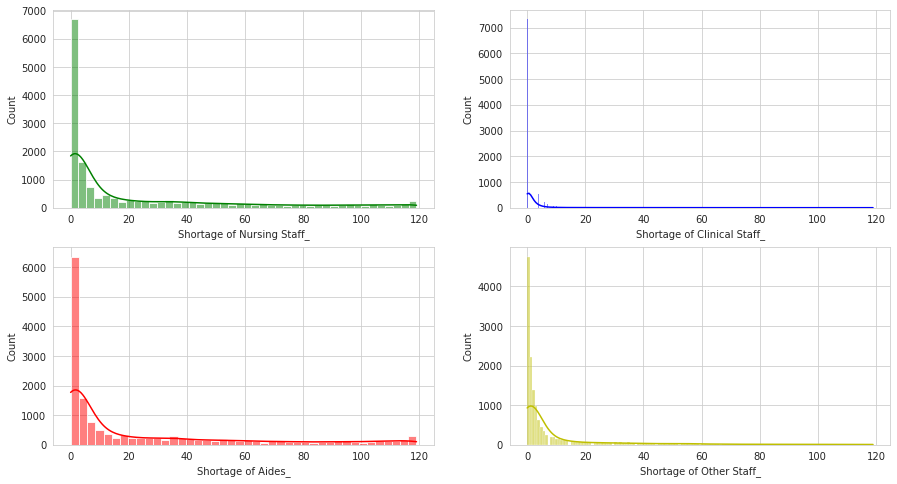

In [65]:
fac_shortage_weekly = fac_data.groupby(['facility_id'], as_index=False)['Shortage of Nursing Staff_', 'Shortage of Clinical Staff_', 'Shortage of Aides_', 'Shortage of Other Staff_'].sum()

fig, axs =  plt.subplots(2, 2, figsize = (15, 8), squeeze=True)
sns.histplot(fac_shortage_weekly['Shortage of Nursing Staff_'], bins='auto', kde=True, color='g', ax=axs[0][0])
sns.histplot(fac_shortage_weekly['Shortage of Clinical Staff_'], bins='auto', kde=True, color='b', ax=axs[0][1])
sns.histplot(fac_shortage_weekly['Shortage of Aides_'], bins='auto', kde=True, color='r', ax=axs[1][0])
sns.histplot(fac_shortage_weekly['Shortage of Other Staff_'], bins='auto', kde=True, color='y', ax=axs[1][1])

In [66]:
def partition_median_shortages(df):

    df['All Shortage of Nursing Staff'] = np.where(df['Shortage of Nursing Staff_'] <= 
                                                   np.median(df['Shortage of Nursing Staff_']) ,
                                                   'Below','Above')

    df['All Shortage of Clinical Staff'] = np.where(df['Shortage of Clinical Staff_'] <= 
                                                    np.median(df['Shortage of Clinical Staff_']) ,
                                                    'Below','Above')

    df['All Shortage of Aides'] = np.where(df['Shortage of Aides_'] <= 
                                           np.median(df['Shortage of Aides_']) ,
                                           'Below','Above')

    df['All Shortage of Other Staff'] = np.where(df['Shortage of Other Staff_'] <= 
                                                 np.median(df['Shortage of Other Staff_']) ,
                                                 'Below','Above')


In [67]:
def plot_shortages(df):

    clr_palette = [ 
                    '#37db78',
                    '#dbb1ce',
                    '#fd8c00',
                    '#9f99db',
                    '#780000'
                ]
                
    fig, axs =  plt.subplots(2, 2, figsize = (15, 8), squeeze=True)              

    sns.countplot(data=df, x='All Shortage of Nursing Staff', 
                order=df['All Shortage of Nursing Staff'].value_counts().index,
                palette=clr_palette, ax=axs[0][0])
    sns.countplot(data=df, x='All Shortage of Clinical Staff', 
                order=df['All Shortage of Clinical Staff'].value_counts().index,
                palette=clr_palette, ax=axs[0][1])
    sns.countplot(data=df, x='All Shortage of Aides', 
                order=df['All Shortage of Aides'].value_counts().index,
                palette=clr_palette, ax=axs[1][0])
    sns.countplot(data=df, x='All Shortage of Other Staff', 
                order=df['All Shortage of Other Staff'].value_counts().index,
                palette=clr_palette, ax=axs[1][1])


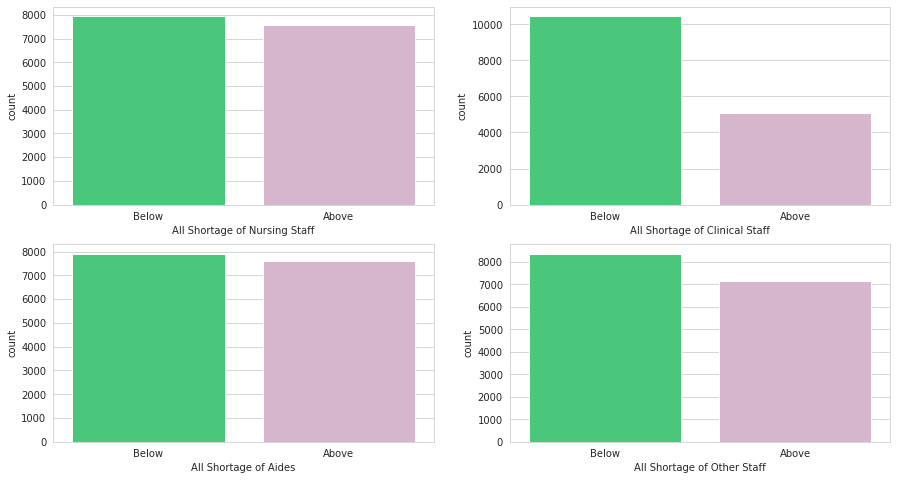

In [68]:
partition_median_shortages(fac_shortage_weekly)
plot_shortages(fac_shortage_weekly)

##### Facility level analysis for eye protection, gowns, gloves, N95 masks that will not be available in 7 days

In [69]:
fac_data2 = raw_data.loc[:, ['Week Ending','week','month','quarter','year','facility_id',
                             'Provider State', 'Provider City', 'County',
                             'Facility No Longer Has Supply Items in 7 Days_', 
                             'N95 Respirator No Longer Available in 7 Days_', 
                             'Face Masks No Longer Available in 7 Days_', 
                             'Eye Protection No Longer Available in 7 Days_',
                             'Gowns No Longer Available in 7 Days_',
                             'Gloves No Longer Available in 7 Days_'
                             ]]
fac_data2.head()


,Week Ending,week,month,quarter,year,facility_id,Provider State,Provider City,County,Facility No Longer Has Supply Items in 7 Days_,N95 Respirator No Longer Available in 7 Days_,Face Masks No Longer Available in 7 Days_,Eye Protection No Longer Available in 7 Days_,Gowns No Longer Available in 7 Days_,Gloves No Longer Available in 7 Days_
0,2020-05-24,2020-05-18,2020-05-01,2020-04-01,2020,15009,AL,RUSSELLVILLE,Franklin,0,0,0,0,0,0
1,2020-05-31,2020-05-25,2020-05-01,2020-04-01,2020,15009,AL,RUSSELLVILLE,Franklin,0,0,0,0,0,0
2,2020-06-07,2020-06-01,2020-06-01,2020-04-01,2020,15009,AL,RUSSELLVILLE,Franklin,0,0,0,0,0,0
3,2020-06-14,2020-06-08,2020-06-01,2020-04-01,2020,15009,AL,RUSSELLVILLE,Franklin,0,0,0,0,0,0
4,2020-06-21,2020-06-15,2020-06-01,2020-04-01,2020,15009,AL,RUSSELLVILLE,Franklin,0,0,0,0,0,0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



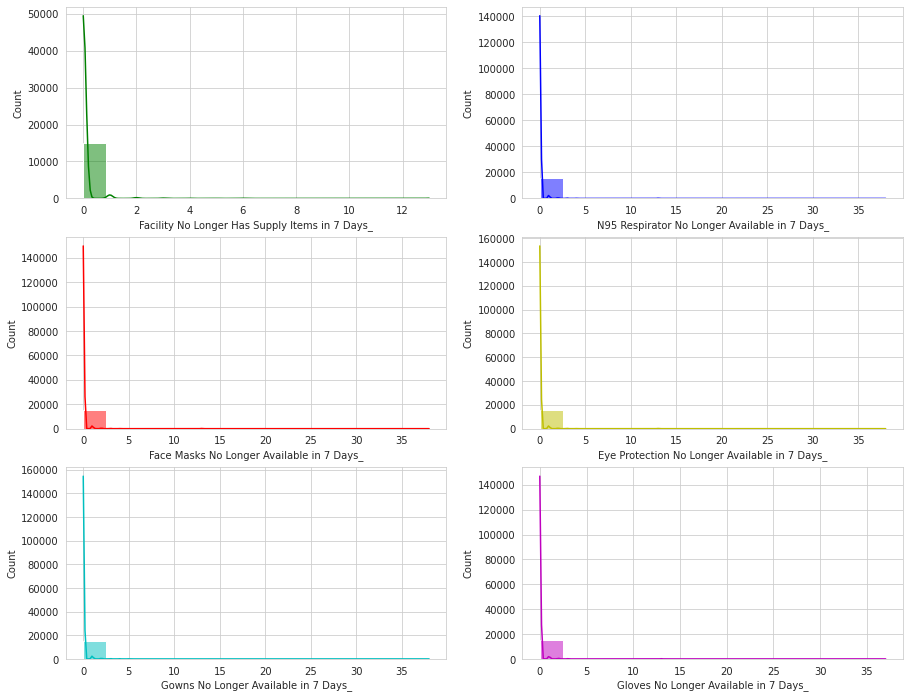

In [70]:
fac_nosupply_weekly = fac_data2.groupby(['facility_id'], as_index=False)['Facility No Longer Has Supply Items in 7 Days_', 'N95 Respirator No Longer Available in 7 Days_', 
                                                                        'Face Masks No Longer Available in 7 Days_', 'Eye Protection No Longer Available in 7 Days_',
                                                                        'Gowns No Longer Available in 7 Days_', 'Gloves No Longer Available in 7 Days_'].sum()

fig, axs =  plt.subplots(3, 2, figsize = (15, 12), squeeze=True)
sns.histplot(fac_nosupply_weekly['Facility No Longer Has Supply Items in 7 Days_'], bins='auto', kde=True, color='g', ax=axs[0][0])
sns.histplot(fac_nosupply_weekly['N95 Respirator No Longer Available in 7 Days_'], bins='auto', kde=True, color='b', ax=axs[0][1])
sns.histplot(fac_nosupply_weekly['Face Masks No Longer Available in 7 Days_'], bins='auto', kde=True, color='r', ax=axs[1][0])
sns.histplot(fac_nosupply_weekly['Eye Protection No Longer Available in 7 Days_'], bins='auto', kde=True, color='y', ax=axs[1][1])
sns.histplot(fac_nosupply_weekly['Gowns No Longer Available in 7 Days_'], bins='auto', kde=True, color='c', ax=axs[2][0])
sns.histplot(fac_nosupply_weekly['Gloves No Longer Available in 7 Days_'], bins='auto', kde=True, color='m', ax=axs[2][1])

In [71]:
def partition_median_supplies(df):

    df['All No Supply 7 Days'] = np.where(df['Facility No Longer Has Supply Items in 7 Days_'] <= 
                                                np.median(df['Facility No Longer Has Supply Items in 7 Days_']), 'Below', 'Above')

    df['All No N95 7 Days'] = np.where(df['N95 Respirator No Longer Available in 7 Days_'] <= 
                                                np.median(df['N95 Respirator No Longer Available in 7 Days_']), 'Below', 'Above')

    df['All No Face Masks 7 Days'] = np.where(df['Face Masks No Longer Available in 7 Days_'] <= 
                                                np.median(df['Face Masks No Longer Available in 7 Days_']), 'Below', 'Above')

    df['All No Eye Protection 7 Days'] = np.where(df['Eye Protection No Longer Available in 7 Days_'] <= 
                                                np.median(df['Eye Protection No Longer Available in 7 Days_']), 'Below', 'Above')

    df['All No Gowns 7 Days'] = np.where(df['Gowns No Longer Available in 7 Days_'] <= 
                                                np.median(df['Gowns No Longer Available in 7 Days_']), 'Below', 'Above')

    df['All No Gloves 7 Days'] = np.where(df['Gloves No Longer Available in 7 Days_'] <= 
                                                np.median(df['Gloves No Longer Available in 7 Days_']), 'Below', 'Above')



In [72]:
def plot_nosupplies(df):
        
    clr_palette = [ 
                    '#37db78',
                    '#dbb1ce',
                    '#fd8c00',
                    '#9f99db',
                    '#780000'
                ]
                
    fig, axs =  plt.subplots(3, 2, figsize = (15, 12), squeeze=True)              

    sns.countplot(data=df, x='All No Supply 7 Days', 
                order=df['All No Supply 7 Days'].value_counts().index,
                palette=clr_palette, ax=axs[0][0])
    sns.countplot(data=df, x='All No N95 7 Days', 
                order=df['All No N95 7 Days'].value_counts().index,
                palette=clr_palette, ax=axs[0][1])
    sns.countplot(data=df, x='All No Face Masks 7 Days', 
                order=df['All No Face Masks 7 Days'].value_counts().index,
                palette=clr_palette, ax=axs[1][0])
    sns.countplot(data=df, x='All No Eye Protection 7 Days', 
                order=df['All No Eye Protection 7 Days'].value_counts().index,
                palette=clr_palette, ax=axs[1][1])
    sns.countplot(data=df, x='All No Gowns 7 Days', 
                order=df['All No Gowns 7 Days'].value_counts().index,
                palette=clr_palette, ax=axs[2][0])
    sns.countplot(data=df, x='All No Gloves 7 Days', 
                order=df['All No Gloves 7 Days'].value_counts().index,
                palette=clr_palette, ax=axs[2][1])


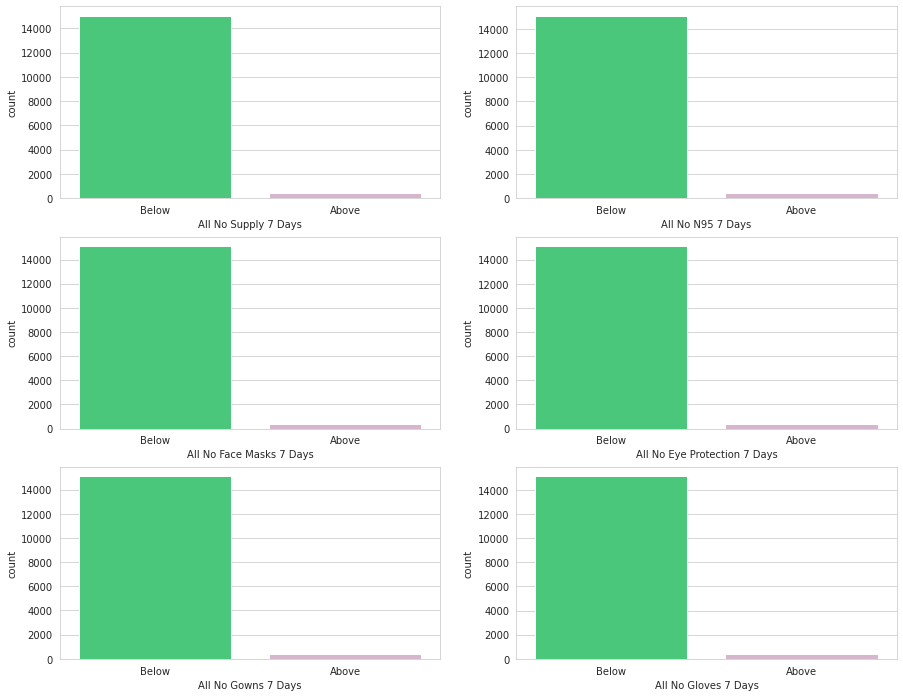

In [73]:
partition_median_supplies(fac_nosupply_weekly)
plot_nosupplies(fac_nosupply_weekly)

### State Level Analysis

#### States with the highest number of facilities

In [74]:
fac_df = raw_data.groupby(by='Provider State', as_index=False)['facility_id'].nunique()
sorted_fac_state = fac_df.sort_values(by='facility_id', ascending=False)

In [75]:
px.bar(sorted_fac_state, x='Provider State', y='facility_id', color='Provider State',
       labels={'facility_id':'Count of Facilities'}, height=400)

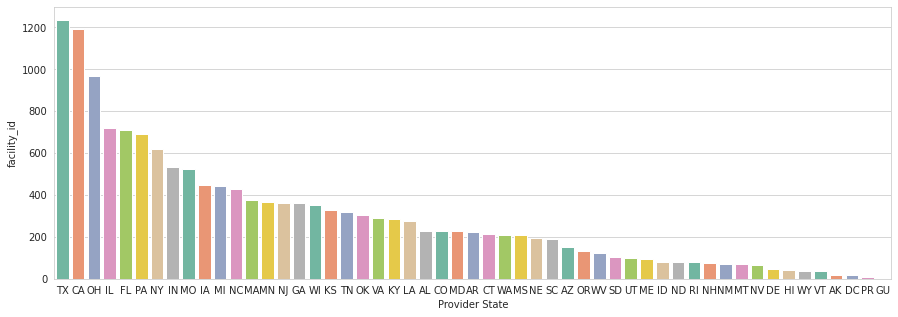

In [76]:
plt.figure(figsize=(15,5))
sns.barplot(x='Provider State', y='facility_id', data=sorted_fac_state,
            palette="Set2")

#### Shortage Analysis

##### State level analysis on shortage of aides, clinical staff, nursing staff and other staff

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



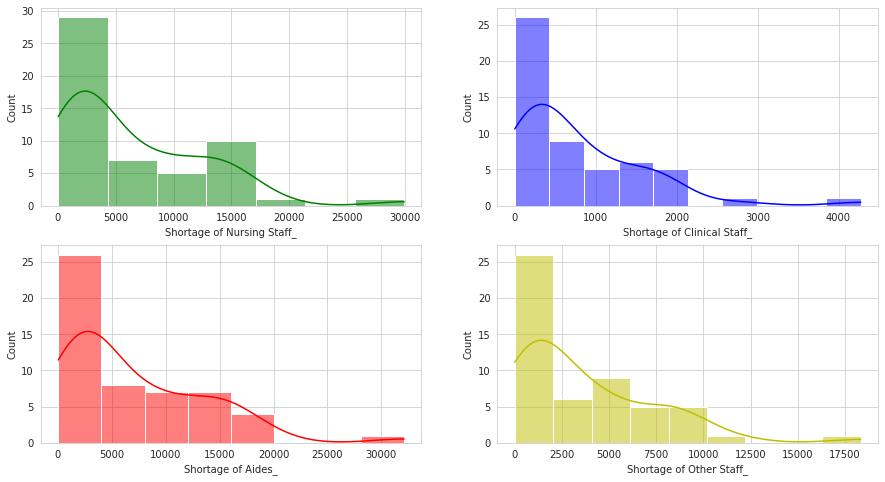

In [77]:
fac_shortage_state = fac_data.groupby(['Provider State'], as_index=False)['Shortage of Nursing Staff_', 'Shortage of Clinical Staff_', 'Shortage of Aides_', 'Shortage of Other Staff_'].sum()

fig, axs =  plt.subplots(2, 2, figsize = (15, 8), squeeze=True)
sns.histplot(fac_shortage_state['Shortage of Nursing Staff_'], bins='auto', kde=True, color='g', ax=axs[0][0])
sns.histplot(fac_shortage_state['Shortage of Clinical Staff_'], bins='auto', kde=True, color='b', ax=axs[0][1])
sns.histplot(fac_shortage_state['Shortage of Aides_'], bins='auto', kde=True, color='r', ax=axs[1][0])
sns.histplot(fac_shortage_state['Shortage of Other Staff_'], bins='auto', kde=True, color='y', ax=axs[1][1])

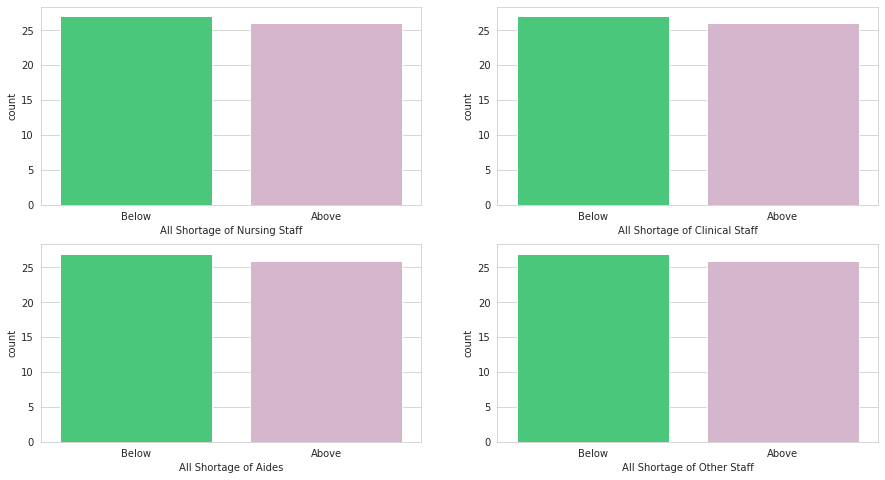

In [78]:
partition_median_shortages(fac_shortage_state)
plot_shortages(fac_shortage_state)

##### State level analysis for eye protection, gowns, gloves, N95 masks that will not be available in 7 days

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



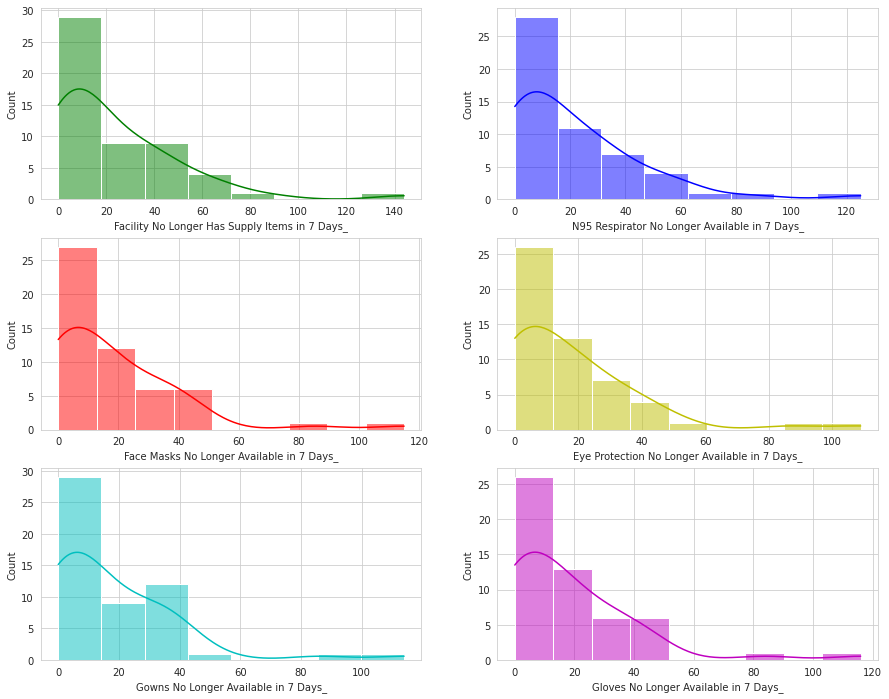

In [79]:
fac_nosupply_state = fac_data2.groupby(['Provider State'], as_index=False)['Facility No Longer Has Supply Items in 7 Days_', 'N95 Respirator No Longer Available in 7 Days_', 
                                                                        'Face Masks No Longer Available in 7 Days_', 'Eye Protection No Longer Available in 7 Days_',
                                                                        'Gowns No Longer Available in 7 Days_', 'Gloves No Longer Available in 7 Days_'].sum()

fig, axs =  plt.subplots(3, 2, figsize = (15, 12), squeeze=True)
sns.histplot(fac_nosupply_state['Facility No Longer Has Supply Items in 7 Days_'], bins='auto', kde=True, color='g', ax=axs[0][0])
sns.histplot(fac_nosupply_state['N95 Respirator No Longer Available in 7 Days_'], bins='auto', kde=True, color='b', ax=axs[0][1])
sns.histplot(fac_nosupply_state['Face Masks No Longer Available in 7 Days_'], bins='auto', kde=True, color='r', ax=axs[1][0])
sns.histplot(fac_nosupply_state['Eye Protection No Longer Available in 7 Days_'], bins='auto', kde=True, color='y', ax=axs[1][1])
sns.histplot(fac_nosupply_state['Gowns No Longer Available in 7 Days_'], bins='auto', kde=True, color='c', ax=axs[2][0])
sns.histplot(fac_nosupply_state['Gloves No Longer Available in 7 Days_'], bins='auto', kde=True, color='m', ax=axs[2][1])

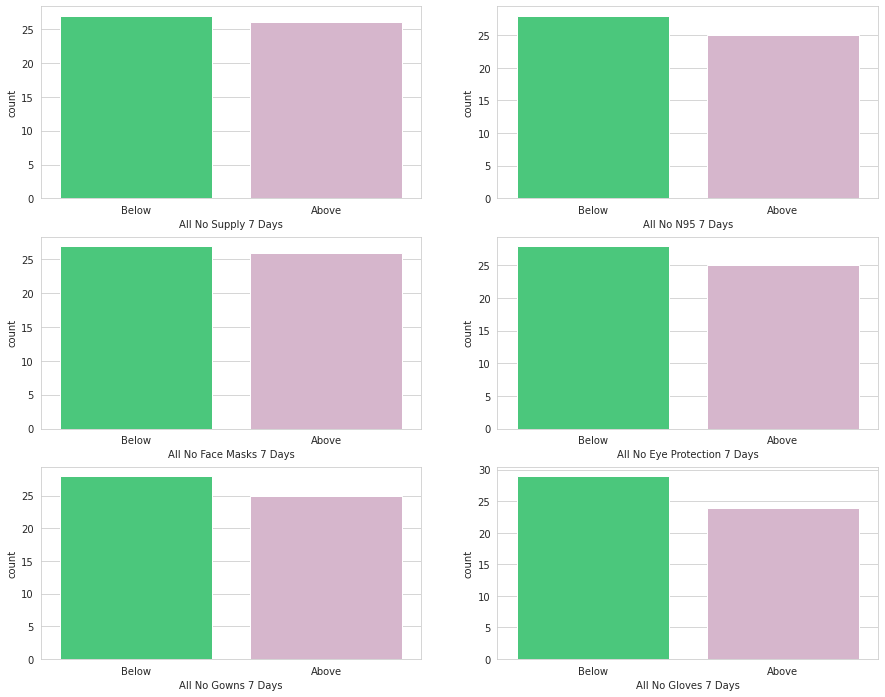

In [80]:
partition_median_supplies(fac_nosupply_state)
plot_nosupplies(fac_nosupply_state)

### City Level Analysis

#### Cities which has the highest number of facilities

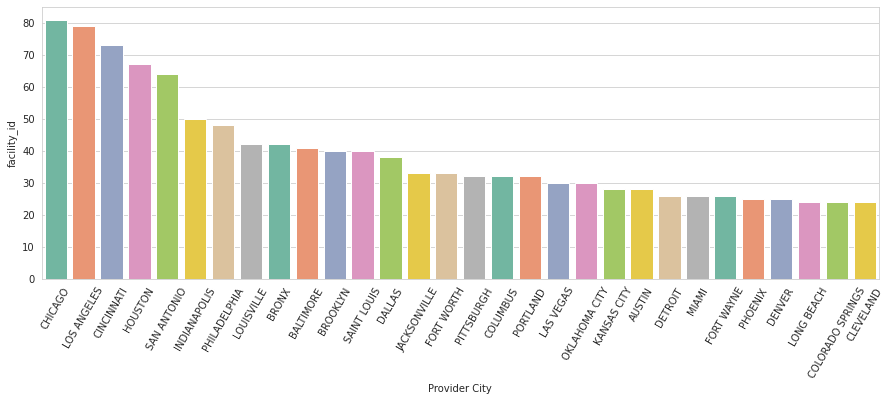

In [ ]:
top30_city_state = sorted_fac_city_state.iloc[:30,:]
plt.figure(figsize=(15,5))
sns.barplot(x='Provider City', y='facility_id', data=top30_city_state,
            palette="Set2")
plt.xticks(rotation=60)
plt.show()

#### Shortage Analysis

##### City level analysis on shortage of aides, clinical staff, nursing staff and other staff

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



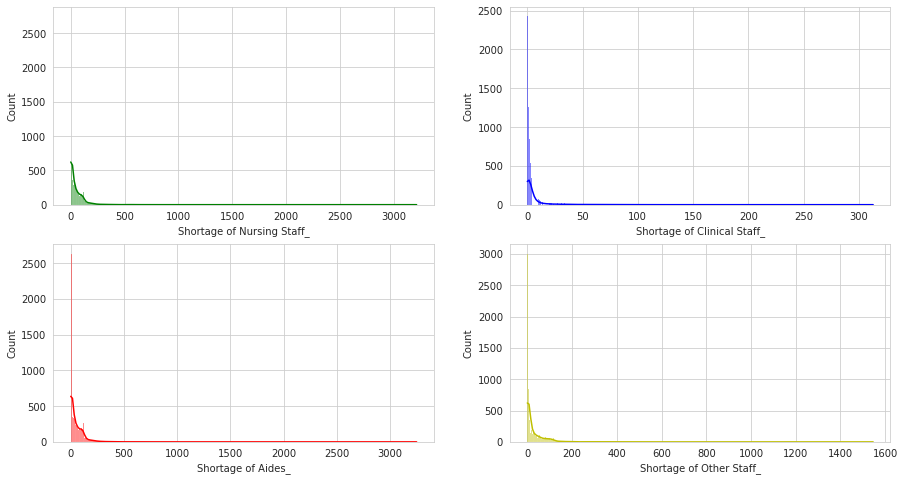

In [83]:
fac_shortage_city = fac_data.groupby(['Provider State','Provider City'], as_index=False)['Shortage of Nursing Staff_', 'Shortage of Clinical Staff_', 'Shortage of Aides_', 'Shortage of Other Staff_'].sum()

fig, axs =  plt.subplots(2, 2, figsize = (15, 8), squeeze=True)
sns.histplot(fac_shortage_city['Shortage of Nursing Staff_'], bins='auto', kde=True, color='g', ax=axs[0][0])
sns.histplot(fac_shortage_city['Shortage of Clinical Staff_'], bins='auto', kde=True, color='b', ax=axs[0][1])
sns.histplot(fac_shortage_city['Shortage of Aides_'], bins='auto', kde=True, color='r', ax=axs[1][0])
sns.histplot(fac_shortage_city['Shortage of Other Staff_'], bins='auto', kde=True, color='y', ax=axs[1][1])

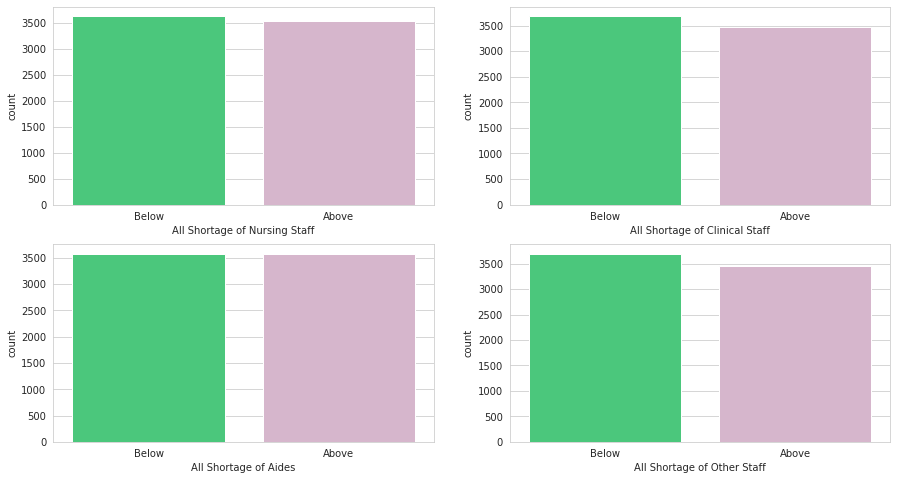

In [84]:
partition_median_shortages(fac_shortage_city)
plot_shortages(fac_shortage_city)

##### City level analysis for eye protection, gowns, gloves, N95 masks that will not be available in 7 days

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



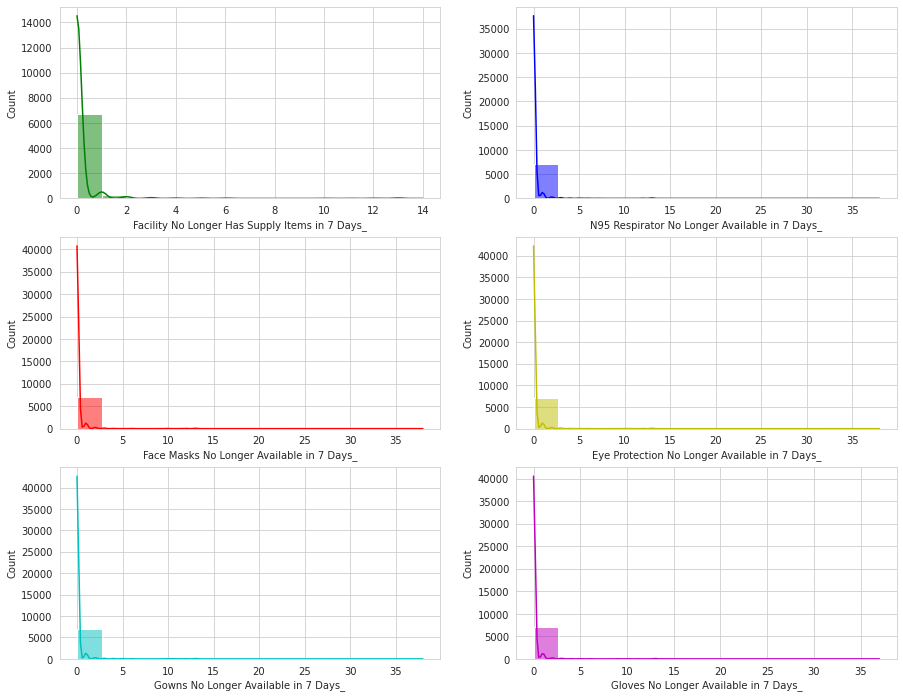

In [86]:
fac_nosupply_city = fac_data2.groupby(['Provider State', 'Provider City'], as_index=False)['Facility No Longer Has Supply Items in 7 Days_', 'N95 Respirator No Longer Available in 7 Days_', 
                                                                        'Face Masks No Longer Available in 7 Days_', 'Eye Protection No Longer Available in 7 Days_',
                                                                        'Gowns No Longer Available in 7 Days_', 'Gloves No Longer Available in 7 Days_'].sum()

fig, axs =  plt.subplots(3, 2, figsize = (15, 12), squeeze=True)
sns.histplot(fac_nosupply_city['Facility No Longer Has Supply Items in 7 Days_'], bins='auto', kde=True, color='g', ax=axs[0][0])
sns.histplot(fac_nosupply_city['N95 Respirator No Longer Available in 7 Days_'], bins='auto', kde=True, color='b', ax=axs[0][1])
sns.histplot(fac_nosupply_city['Face Masks No Longer Available in 7 Days_'], bins='auto', kde=True, color='r', ax=axs[1][0])
sns.histplot(fac_nosupply_city['Eye Protection No Longer Available in 7 Days_'], bins='auto', kde=True, color='y', ax=axs[1][1])
sns.histplot(fac_nosupply_city['Gowns No Longer Available in 7 Days_'], bins='auto', kde=True, color='c', ax=axs[2][0])
sns.histplot(fac_nosupply_city['Gloves No Longer Available in 7 Days_'], bins='auto', kde=True, color='m', ax=axs[2][1])

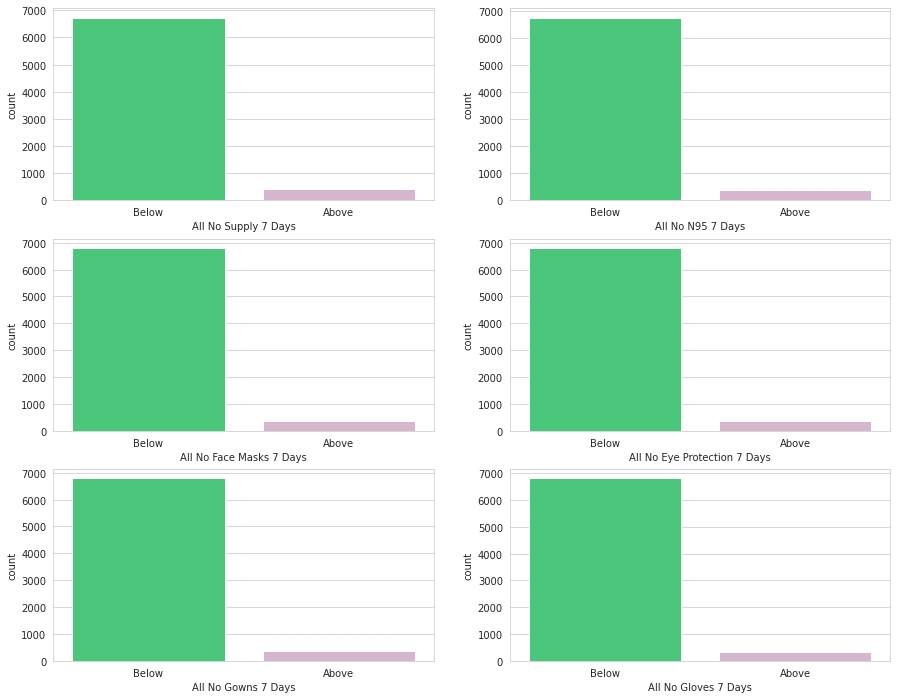

In [87]:
partition_median_supplies(fac_nosupply_city)
plot_nosupplies(fac_nosupply_city)

### County Level Analysis

#### Counties which has the highest number of facilities

In [88]:
fac_county_df = raw_data.groupby(by=['Provider State', 'County'], as_index=False)['facility_id'].nunique()
sorted_fac_county_state = fac_county_df.sort_values(by='facility_id', ascending=False, ignore_index=True)
sorted_fac_county_state.head(10)

,Provider State,County,facility_id
0,CA,Los Angeles,382
1,IL,Cook,210
2,TX,Harris,107
3,OH,Cuyahoga,101
4,TX,Dallas,88
5,AZ,Maricopa,85
6,CA,San Diego,83
7,MA,Middlesex,79
8,CA,Orange,75
9,TX,Tarrant,74


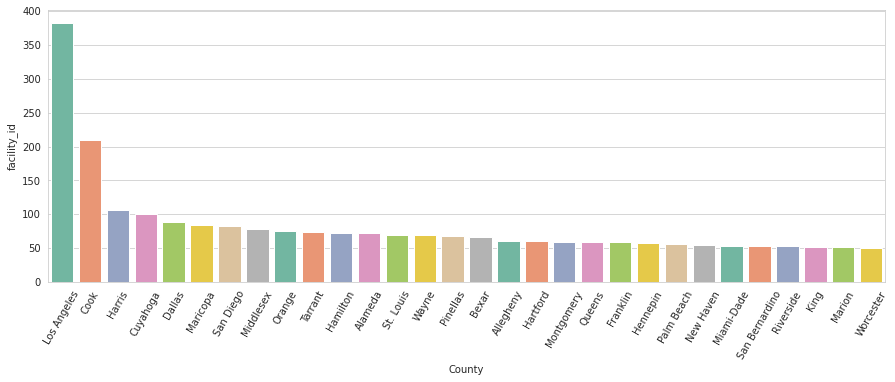

In [89]:
top30_county_state = sorted_fac_county_state.iloc[:30,:]
plt.figure(figsize=(15,5))
sns.barplot(x='County', y='facility_id', data=top30_county_state,
            palette="Set2")
plt.xticks(rotation=60)
plt.show()

#### Shortage Analysis

##### County level analysis on shortage of aides, clinical staff, nursing staff and other staff

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



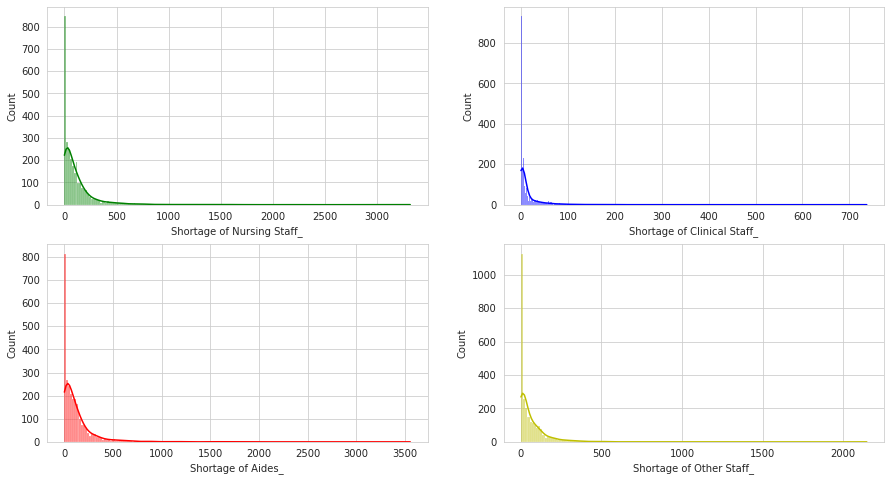

In [90]:
fac_shortage_county = fac_data.groupby(['Provider State','County'], as_index=False)['Shortage of Nursing Staff_', 'Shortage of Clinical Staff_', 'Shortage of Aides_', 'Shortage of Other Staff_'].sum()

fig, axs =  plt.subplots(2, 2, figsize = (15, 8), squeeze=True)
sns.histplot(fac_shortage_county['Shortage of Nursing Staff_'], bins='auto', kde=True, color='g', ax=axs[0][0])
sns.histplot(fac_shortage_county['Shortage of Clinical Staff_'], bins='auto', kde=True, color='b', ax=axs[0][1])
sns.histplot(fac_shortage_county['Shortage of Aides_'], bins='auto', kde=True, color='r', ax=axs[1][0])
sns.histplot(fac_shortage_county['Shortage of Other Staff_'], bins='auto', kde=True, color='y', ax=axs[1][1])

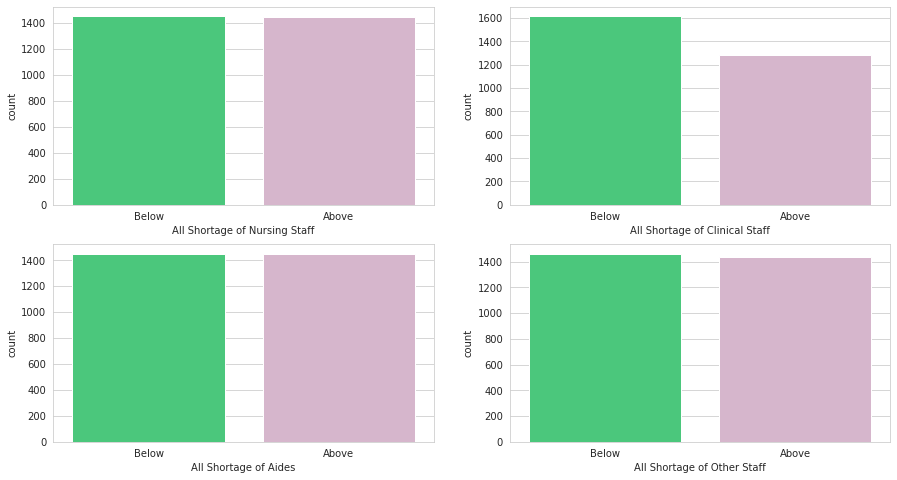

In [91]:
partition_median_shortages(fac_shortage_county)
plot_shortages(fac_shortage_county)

##### County level analysis for eye protection, gowns, gloves, N95 masks that will not be available in 7 days

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



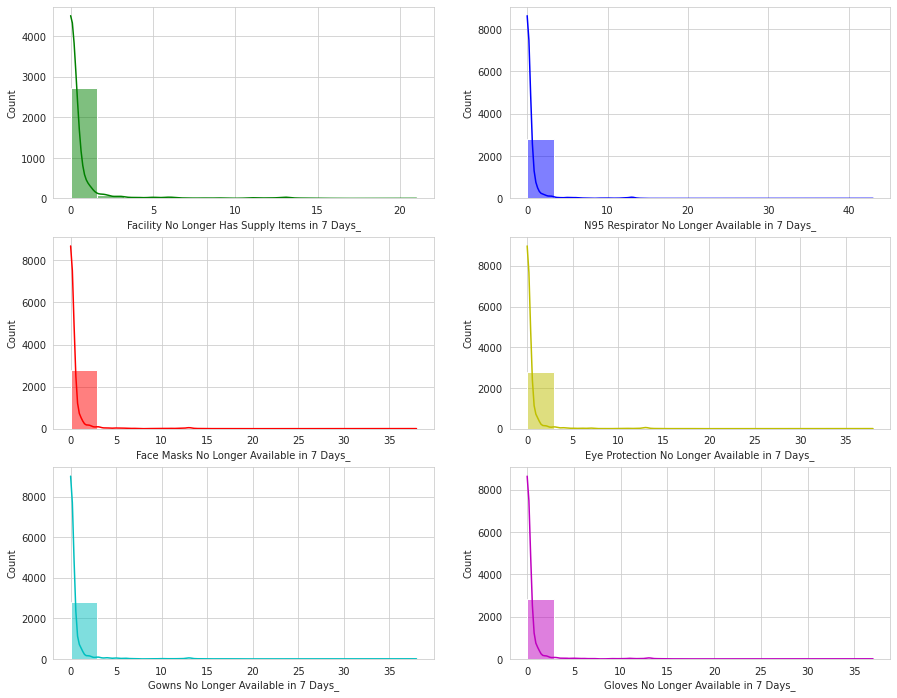

In [92]:
fac_nosupply_county = fac_data2.groupby(['Provider State', 'County'], as_index=False)['Facility No Longer Has Supply Items in 7 Days_', 'N95 Respirator No Longer Available in 7 Days_', 
                                                                        'Face Masks No Longer Available in 7 Days_', 'Eye Protection No Longer Available in 7 Days_',
                                                                        'Gowns No Longer Available in 7 Days_', 'Gloves No Longer Available in 7 Days_'].sum()

fig, axs =  plt.subplots(3, 2, figsize = (15, 12), squeeze=True)
sns.histplot(fac_nosupply_county['Facility No Longer Has Supply Items in 7 Days_'], bins='auto', kde=True, color='g', ax=axs[0][0])
sns.histplot(fac_nosupply_county['N95 Respirator No Longer Available in 7 Days_'], bins='auto', kde=True, color='b', ax=axs[0][1])
sns.histplot(fac_nosupply_county['Face Masks No Longer Available in 7 Days_'], bins='auto', kde=True, color='r', ax=axs[1][0])
sns.histplot(fac_nosupply_county['Eye Protection No Longer Available in 7 Days_'], bins='auto', kde=True, color='y', ax=axs[1][1])
sns.histplot(fac_nosupply_county['Gowns No Longer Available in 7 Days_'], bins='auto', kde=True, color='c', ax=axs[2][0])
sns.histplot(fac_nosupply_county['Gloves No Longer Available in 7 Days_'], bins='auto', kde=True, color='m', ax=axs[2][1])

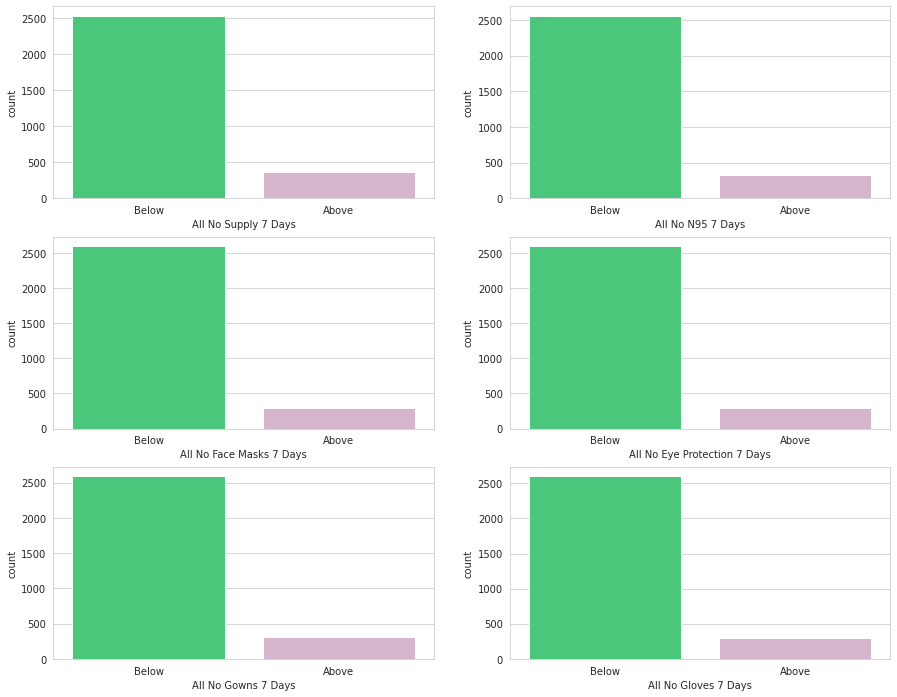

In [93]:
partition_median_supplies(fac_nosupply_county)
plot_nosupplies(fac_nosupply_county)

### Patient Level Analysis

#### Top 10 situations where facilities were not able to handle the covid spread

In [94]:
spread_data_all = raw_data.copy(deep=True)
spread_data_all['cov_spread'] = spread_data_all['Residents Weekly Confirmed COVID-19'] - spread_data_all['Residents Weekly Admissions COVID-19']
spread_data = spread_data_all.iloc[:,[0,1,2,3,4,5,6,7,8,9,12,13,14,15,16,17,18,19,-1]]
spread_data = spread_data.sort_values(by='cov_spread', ascending=False, ignore_index=True)
spread_data.head(10)

,week,month,quarter,year,Shortage of Nursing Staff_,Shortage of Clinical Staff_,Shortage of Aides_,Shortage of Other Staff_,Facility No Longer Has Supply Items in 7 Days_,N95 Respirator No Longer Available in 7 Days_,Gowns No Longer Available in 7 Days_,Gloves No Longer Available in 7 Days_,facility_id,Week Ending,Provider Name,Provider Address,Provider City,Provider State,cov_spread
0,2020-05-18,2020-05-01,2020-04-01,2020,1,0,1,1,0,0,0,0,395015,2020-05-24,BRIGHTON REHABILITATION AND WELLNESS CENTER,246 FRIENDSHIP CIRCLE,BEAVER,PA,297.0
1,2020-11-23,2020-11-01,2020-10-01,2020,0,0,0,0,0,0,0,0,235573,2020-11-29,GRACEWAY AT COUNTRYSIDE,120 BASELINE RD,SOUTH HAVEN,MI,267.0
2,2020-05-18,2020-05-01,2020-04-01,2020,0,0,0,0,0,0,0,0,315017.0,2020-05-24,BERGEN NEW BRIDGE MEDICAL CENTER,230 E RIDGEWOOD AVE,PARAMUS,NJ,188.0
3,2020-05-18,2020-05-01,2020-04-01,2020,1,0,1,0,0,0,0,0,395780,2020-05-24,FAIR ACRES GERIATRIC CENTER,340 N. MIDDLETOWN ROAD,LIMA,PA,176.0
4,2020-05-18,2020-05-01,2020-04-01,2020,0,0,0,0,0,0,0,0,395078,2020-05-24,MARPLE GARDENS REHABILITATION AND NURSING CENTER,50 NORTH MALIN ROAD,BROOMALL,PA,172.0
5,2020-05-18,2020-05-01,2020-04-01,2020,0,0,0,0,0,0,0,0,315458,2020-05-24,NEW VISTA NURSING & REHABILITATION CTR,300 BROADWAY,NEWARK,NJ,162.0
6,2020-05-18,2020-05-01,2020-04-01,2020,0,0,0,0,0,0,0,0,75228,2020-05-24,ARDEN HOUSE,850 MIX AVE,HAMDEN,CT,158.0
7,2020-07-06,2020-07-01,2020-07-01,2020,1,0,1,1,0,0,0,0,105390,2020-07-12,BALANCED HEALTHCARE,4250 66TH ST N,SAINT PETERSBURG,FL,144.0
8,2020-05-18,2020-05-01,2020-04-01,2020,0,0,0,0,0,0,0,0,335301,2020-05-24,ST JAMES REHABILITATION & HEALTHCARE CENTER,275 MORICHES ROAD,ST JAMES,NY,144.0
9,2020-05-18,2020-05-01,2020-04-01,2020,1,0,1,1,0,0,0,0,115542,2020-05-24,SADIE G. MAYS HEALTH & REHABILITATION CENTER,1821 ANDERSON AVENUE NW,ATLANTA,GA,142.0


#### Top 10 situations where the weekly death percentage was the highest

In [95]:
spread_data_2 = spread_data_all.loc[(spread_data_all['Residents Weekly Confirmed COVID-19'] > 0) & (spread_data_all['Residents Weekly COVID-19 Deaths'] > 0)]
spread_data_2['death_pct'] = (spread_data_2['Residents Weekly Confirmed COVID-19'] - spread_data_2['Residents Weekly COVID-19 Deaths'])/spread_data_2['Residents Weekly Confirmed COVID-19']
cov_death_data = spread_data_2.iloc[:,[0,1,2,3,4,5,6,7,8,9,12,13,14,15,16,17,18,19,-1]]
cov_death_data = cov_death_data.sort_values(by='death_pct', ascending=True, ignore_index=True)
cov_death_data.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,week,month,quarter,year,Shortage of Nursing Staff_,Shortage of Clinical Staff_,Shortage of Aides_,Shortage of Other Staff_,Facility No Longer Has Supply Items in 7 Days_,N95 Respirator No Longer Available in 7 Days_,Gowns No Longer Available in 7 Days_,Gloves No Longer Available in 7 Days_,facility_id,Week Ending,Provider Name,Provider Address,Provider City,Provider State,death_pct
0,2020-11-23,2020-11-01,2020-10-01,2020,0,0,0,0,0,0,0,0,395705,2020-11-29,HEMPFIELD MANOR,1118 WOODWARD DRIVE,GREENSBURG,PA,-29.0
1,2020-05-18,2020-05-01,2020-04-01,2020,0,0,0,0,0,0,0,0,56244,2020-05-24,GRAND PARK CONVALESCENT HOSPITAL,2312 WEST 8TH STREET,LOS ANGELES,CA,-24.0
2,2020-05-18,2020-05-01,2020-04-01,2020,0,0,0,0,0,0,0,0,335676,2020-05-24,"HAVEN MANOR HEALTH CARE CENTER, L L C",1441 GATEWAY BOULEVARD,FAR ROCKAWAY,NY,-23.0
3,2020-06-22,2020-06-01,2020-04-01,2020,0,0,0,0,0,0,0,0,235325,2020-06-28,THE VILLA AT CITY CENTER,11700 E TEN MILE RD,WARREN,MI,-21.0
4,2021-01-04,2021-01-01,2021-01-01,2021,0,0,0,0,0,0,0,0,335788,2021-01-10,WESTERN NEW YORK STATE VETERANS HOME,220 RICHMOND AVENUE,BATAVIA,NY,-20.0
5,2020-05-18,2020-05-01,2020-04-01,2020,0,0,0,0,0,0,0,0,265118,2020-05-24,FRONTIER HEALTH & REHABILITATION,2840 WEST CLAY ST,SAINT CHARLES,MO,-20.0
6,2020-05-18,2020-05-01,2020-04-01,2020,0,0,0,0,0,0,0,0,225491,2020-05-24,SHREWSBURY NURSING & REHABILITATION CENTER,40 JULIO DRIVE,SHREWSBURY,MA,-18.0
7,2020-05-18,2020-05-01,2020-04-01,2020,0,0,0,0,0,0,0,0,315276,2020-05-24,COMPLETE CARE AT MILFORD MANOR LLC,69 MAPLE ROAD,WEST MILFORD,NJ,-18.0
8,2020-05-18,2020-05-01,2020-04-01,2020,0,0,0,0,0,0,0,0,345225,2020-05-24,SIGNATURE HEALTHCARE OF CHAPEL HILL,1602 E FRANKLIN STREET,CHAPEL HILL,NC,-16.0
9,2020-05-18,2020-05-01,2020-04-01,2020,0,0,0,0,0,0,0,0,395708,2020-05-24,"GARDENS FOR MEMORY CARE AT EASTON, THE",500 WASHINGTON STREET,EASTON,PA,-16.0
